# ML Seguro Medico

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Lasso
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, LassoCV
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

In [2]:
df = pd.read_csv("../data/raw/internal-link(2).csv")

df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Observaciones 
> - `age` Edad del beneficiario principal (numérico)
> - `sex` Género del beneficiario principal (categórico)
> - `bmi` índice de masa corporal (numérico)
> - `children` Número de niños/dependientes cubiertos por un seguro médico (numérico)
> - `smoker` ¿Es fumador? (categórico)
> - `region`. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
> - `charges`. Prima del seguro médico (numérico)

In [3]:
df.shape

(1338, 7)

**El dataset contiene 1338 registros y 7 Variables**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Limpieza de datos: Eliminar duplicados


In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:

df.isnull().sum() # Verifico valores nulos y duplicados

df.duplicated().sum()

if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    
df.shape

(1337, 7)

# Observaciones

Se ha enccontrado 1 duplicado

# Analisis de variables categóricas


In [8]:
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    df[col].value_counts()
    df[col].value_counts(normalize=True)


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


# Observaciones Variables Categóricas:
>
> - `smoker`: Variable crítica, gran impacto en costes
>
> - `sex`: Distribución balanceada (50/50 aprox)
>
> - `region`: Distribución similar entre las 4 regiones

# Visualización de distribuciones

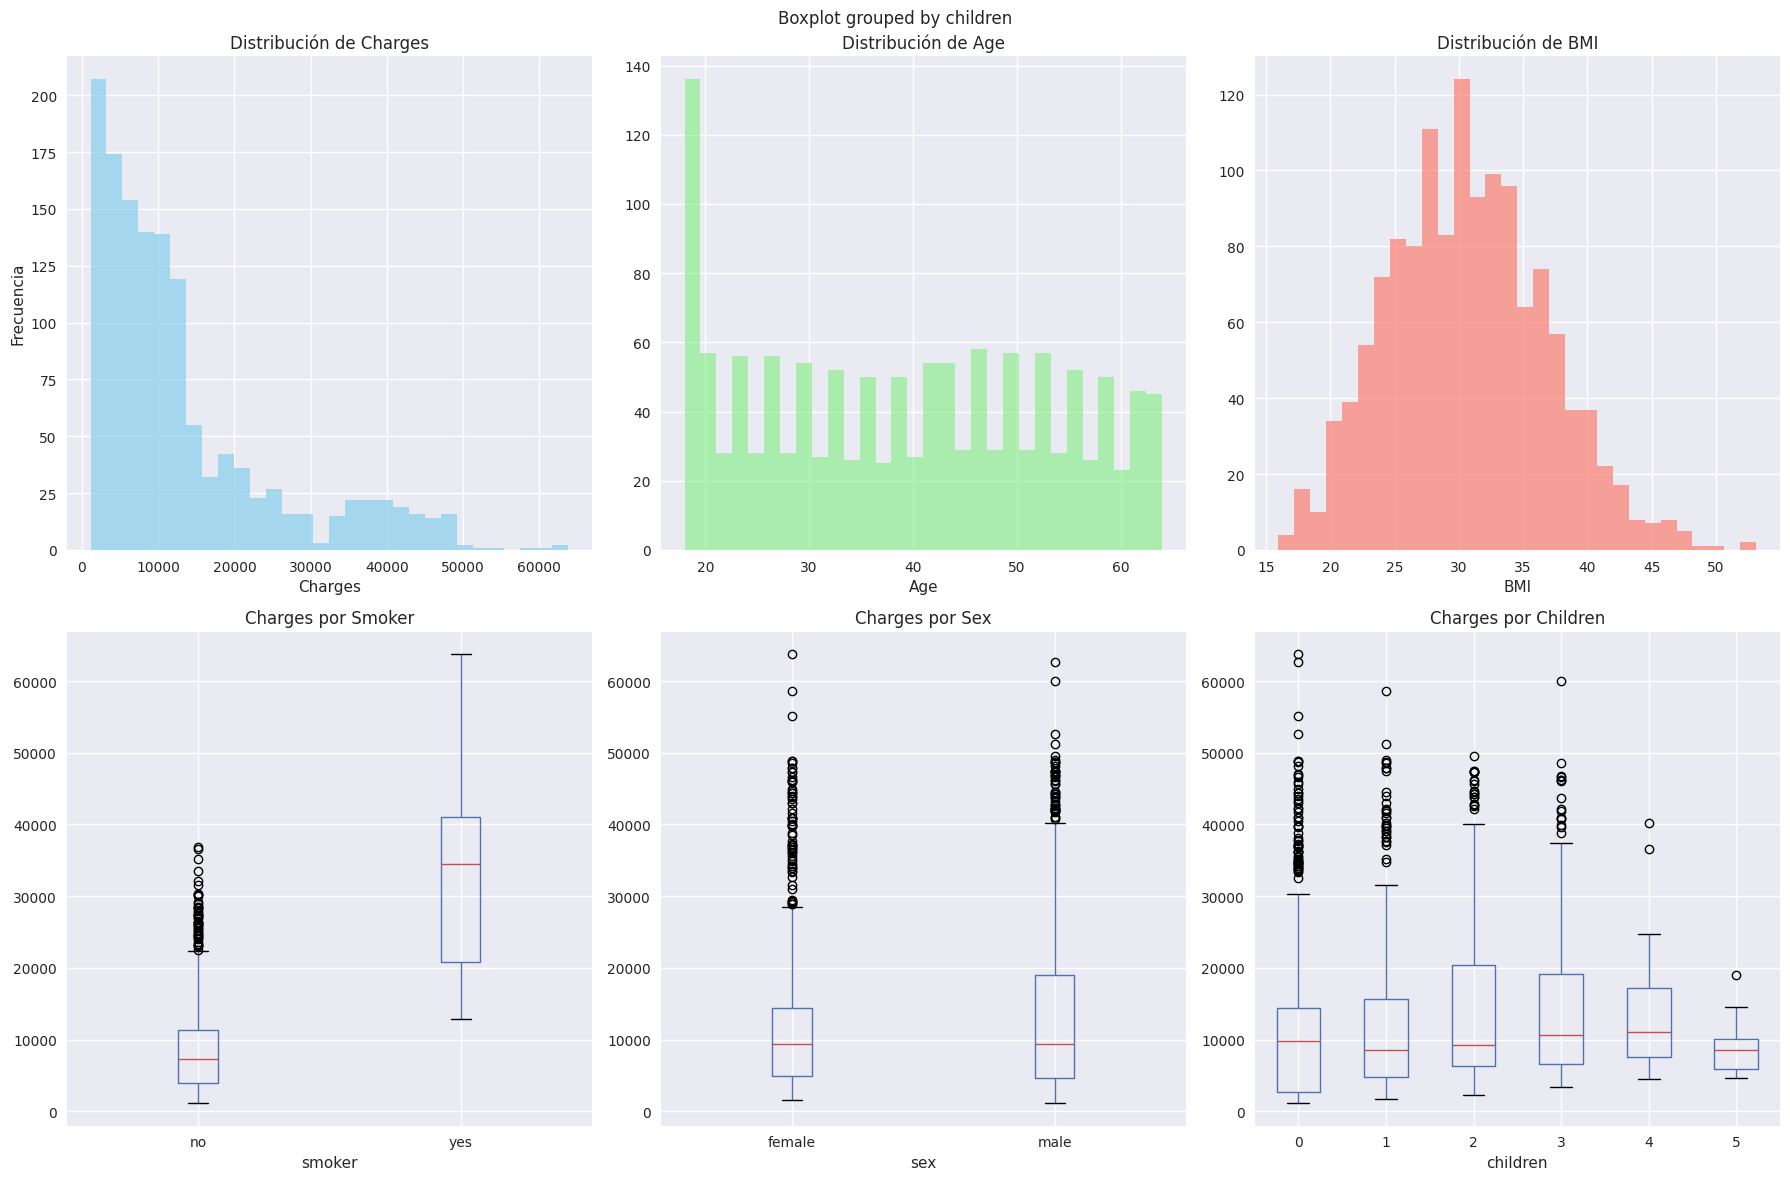

In [10]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0,0].hist(df['charges'], bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribución de Charges')
axes[0,0].set_xlabel('Charges')
axes[0,0].set_ylabel('Frecuencia')

axes[0,1].hist(df['age'], bins=30, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribución de Age')
axes[0,1].set_xlabel('Age')

axes[0,2].hist(df['bmi'], bins=30, alpha=0.7, color='salmon')
axes[0,2].set_title('Distribución de BMI')
axes[0,2].set_xlabel('BMI')

df.boxplot(column='charges', by='smoker', ax=axes[1,0])
axes[1,0].set_title('Charges por Smoker')

df.boxplot(column='charges', by='sex', ax=axes[1,1])
axes[1,1].set_title('Charges por Sex')

df.boxplot(column='charges', by='children', ax=axes[1,2])
axes[1,2].set_title('Charges por Children')

plt.tight_layout()
plt.show()

> ### Observaciones

**Distribución de Charges:**
- Distribución muy sesgada a la derecha
- La mayoría de los costes están entre $0-$20,000
- Hay valores atípicos muy altos (hasta $60,000+)
- **Conclusión:** Necesitaremos transformación logarítmica o escalado

**Distribución de Age:**
- Distribución relativamente uniforme entre 20-60 años
- Pico alrededor de 20 años (adultos jóvenes)

**Distribución de BMI:**
- Distribución aproximadamente normal
- Centro alrededor de 30-35 BMI
- **Conclusión:** Variable numérica bien comportada

**Charges por Smoker:**
- **Diferencia ABISMAL** entre fumadores y no fumadores
- Fumadores: costes mucho más altos ($30,000-$60,000)
- No fumadores: costes más bajos ($0-$20,000)
- **Conclusión:** `smoker` es la variable MÁS IMPORTANTE

**Charges por Sex:**
- Diferencias mínimas entre hombres y mujeres
- Distribuciones muy similares
- **Conclusión:** Confirmamos excluir `sex` del modelo

**Charges por Children:**
- Ligera tendencia: más hijos = costes ligeramente más altos
- Diferencias no muy pronunciadas
- **Conclusión:** `children` tiene impacto moderado

> ### Conclusiones Finales para el Modelo:

**Variables definitivas para el modelo:**
- `age` (alta importancia)
- `bmi` (alta importancia) 
- `smoker` (CRÍTICA - variable más importante)
- `children` (importancia moderada)

**Variables excluidas:**
- `sex` (impacto mínimo)
- `region` (no mostrado pero sabemos baja correlación)

**Preparación de datos necesaria:**
- One-Hot Encoding para `smoker`
- Posible transformación logarítmica de `charges`
- Escalado de variables numéricas


# Análisis de correlaciones

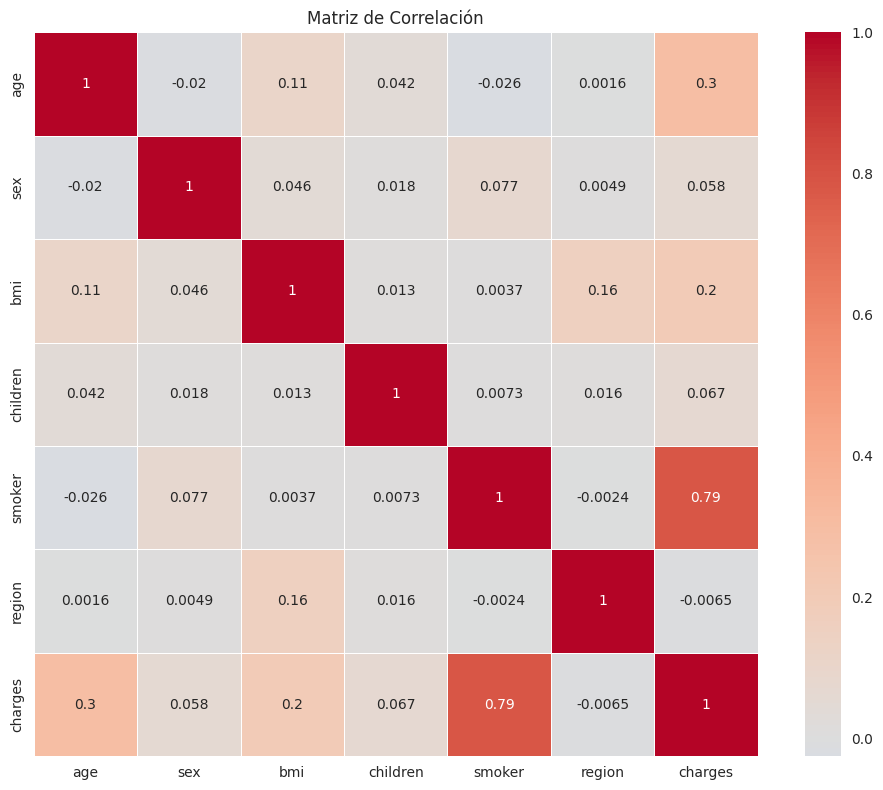

In [11]:
df_encoded = df.copy()
le = LabelEncoder()
categorical_cols = ['sex', 'smoker', 'region']
mask = np.triu(np.ones_like(df_encoded, dtype=bool))

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])

plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


> ### Observaciones de la Matriz de Correlación:

**Correlaciones con charges (variable objetivo):**
- `smoker`: **0.79** → Correlación MUY ALTA (variable más importante)
- `age`: **0.30** → Correlación moderada-alta
- `bmi`: **0.20** → Correlación moderada
- `children`: **0.067** → Correlación baja
- `sex`: **0.058** → Correlación muy baja
- `region`: **-0.0065** → Correlación prácticamente nula

**Correlaciones entre variables predictoras:**
- `age`-`bmi`: 0.11 (baja correlación)
- `bmi`-`region`: 0.16 (baja correlación)


> ### Conclusiones Definitivas para el Modelo:

**Variables que SÍ utilizaremos:**
- `smoker` (correlación 0.79 - CRÍTICA)
- `age` (correlación 0.30 - IMPORTANTE)
- `bmi` (correlación 0.20 - MODERADA)
- `children` (correlación 0.067 - BAJA pero presente)

**Variables que NO utilizaremos:**
- `sex` (correlación 0.058 - impacto mínimo)
- `region` (correlación -0.0065 - sin impacto)




# **Conclusión EDA:**
>
> - Variables que utilizare en el proceso predictivo:
> 
> - `age`, `bmi`, `children`, `smoker`
>
> - Variables que no utilizare:
>
> - `sex`, `region` (baja correlación con charges)
> 
> - Variable objetivo:
> 
> - `charges`

# **Modelo de Regresión Lineal**


In [13]:
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']



## One-Hot Encoding para la variable smoker

In [14]:

X = pd.get_dummies(X, columns=['smoker'], drop_first=True)
X.columns = ['age', 'bmi', 'children', 'smoker_yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_train

,age,bmi,children,smoker_yes
1114,23,24.510,0,False
968,21,25.745,2,False
599,52,37.525,2,False
170,63,41.470,0,False
275,47,26.600,2,False
...,...,...,...,...
1096,51,34.960,2,True
1131,27,45.900,2,False
1295,20,22.000,1,False
861,38,28.000,3,False


In [16]:
X_test

,age,bmi,children,smoker_yes
900,49,22.515,0,False
1064,29,25.600,4,False
1256,51,36.385,3,False
298,31,34.390,3,True
237,31,38.390,2,False
...,...,...,...,...
534,64,40.480,0,False
542,63,36.300,0,False
760,22,34.580,2,False
1284,61,36.300,1,True


In [17]:
y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

In [18]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

## Escalar variables numéricas

In [19]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Creo y entreno modelo de regresión lineal

In [20]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir en train y test
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


# Calcular métricas

In [21]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)



# Muestro coeficientes del modelo

In [22]:

coefficients = pd.DataFrame({
    'variable': X.columns,
    'coeficiente': model.coef_
})
coefficients = coefficients.sort_values('coeficiente', key=abs, ascending=False)

coefficients

,variable,coeficiente
3,smoker_yes,9220.234600
0,age,3486.695758
1,bmi,1846.565623
2,children,642.426873


# Visualizacion del modelo

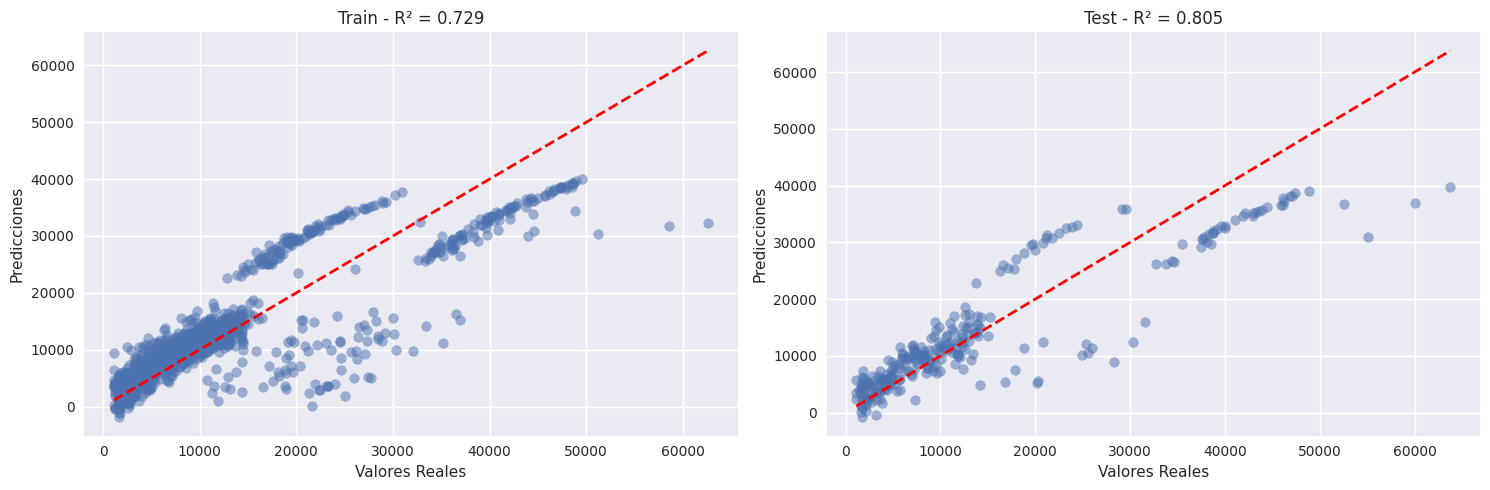

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Predicciones vs Valores reales (train)
axes[0].scatter(y_train, y_pred_train, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Predicciones')
axes[0].set_title(f'Train - R² = {train_r2:.3f}')

# Predicciones vs Valores reales (test)
axes[1].scatter(y_test, y_pred_test, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Predicciones')
axes[1].set_title(f'Test - R² = {test_r2:.3f}')

plt.tight_layout()
plt.show()

# métricas y coeficientes

In [24]:
f"Train MSE: {train_mse:,.2f}"

'Train MSE: 37,074,295.27'

In [25]:
f"Test MSE: {test_mse:,.2f}"

'Test MSE: 35,914,551.48'

In [26]:
f"Train R²: {train_r2:.3f}"

'Train R²: 0.729'

In [27]:
f"Test R²: {test_r2:.3f}"

'Test R²: 0.805'

In [28]:
coefficients #Coeficientes del modelo

,variable,coeficiente
3,smoker_yes,9220.234600
0,age,3486.695758
1,bmi,1846.565623
2,children,642.426873


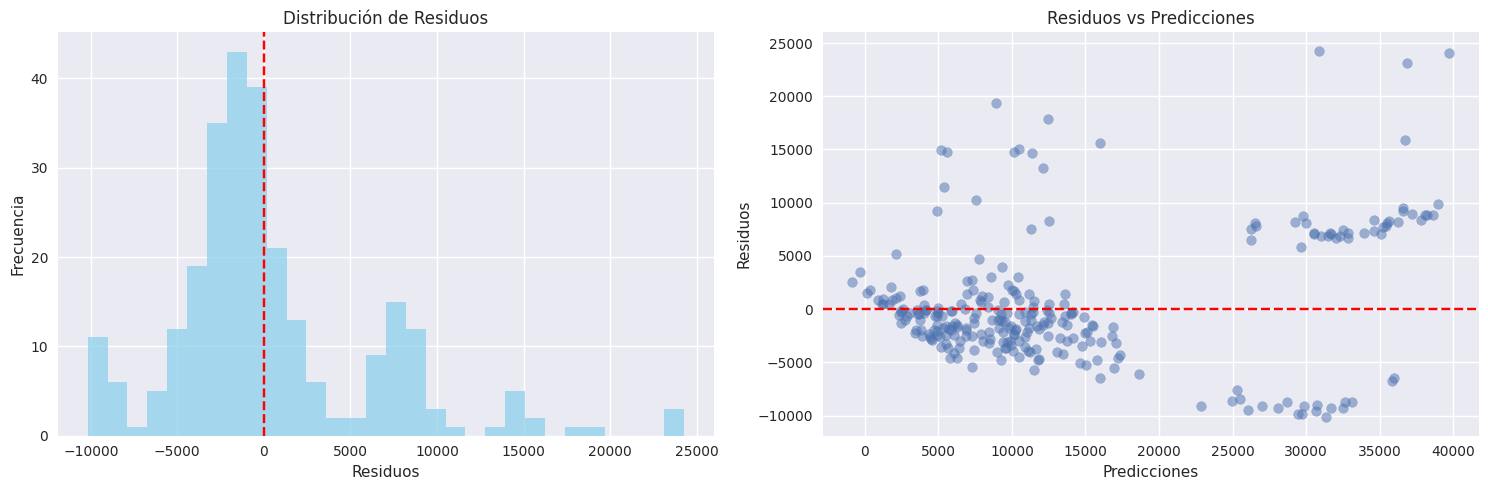

In [29]:
# Análisis de residuos
residuos = y_test - y_pred_test

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de residuos
axes[0].hist(residuos, bins=30, alpha=0.7, color='skyblue')
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_xlabel('Residuos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Residuos')

# Residuos vs Predicciones
axes[1].scatter(y_pred_test, residuos, alpha=0.5)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Residuos')
axes[1].set_title('Residuos vs Predicciones')

plt.tight_layout()
plt.show()

# Lasso
## Probamos diferentes valores de alpha para Lasso


In [30]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Entrenar modelos Lasso con diferentes alphas
lasso_results = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    
    # Predecir
    y_pred_lasso_train = lasso.predict(X_train_scaled)
    y_pred_lasso_test = lasso.predict(X_test_scaled)
    
    # Calcular métricas
    train_r2 = r2_score(y_train, y_pred_lasso_train)
    test_r2 = r2_score(y_test, y_pred_lasso_test)
    train_mse = mean_squared_error(y_train, y_pred_lasso_train)
    test_mse = mean_squared_error(y_test, y_pred_lasso_test)
    
    lasso_results.append({
        'alpha': alpha,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'coeficientes': lasso.coef_,
        'n_coeficientes_no_cero': np.sum(lasso.coef_ != 0)
    })

# Convertir a DataFrame para mejor visualización
lasso_df = pd.DataFrame(lasso_results)
lasso_df

,alpha,train_r2,test_r2,train_mse,test_mse,coeficientes,n_coeficientes_no_cero
0,0.001,0.729216,0.804553,3.707430e+07,3.591456e+07,"[3486.6949552636306, 1846.5647075795805, 642.4...",4
1,0.010,0.729216,0.804553,3.707430e+07,3.591459e+07,"[3486.691863720109, 1846.5561887165402, 642.41...",4
2,0.100,0.729216,0.804551,3.707430e+07,3.591501e+07,"[3486.613045445812, 1846.4741408551292, 642.33...",4
3,1.000,0.729216,0.804528,3.707430e+07,3.591924e+07,"[3485.8248627028397, 1845.653662241023, 641.49...",4
4,10.000,0.729213,0.804296,3.707467e+07,3.596185e+07,"[3477.9430352731165, 1837.4488760999689, 633.1...",4
5,100.000,0.728942,0.801776,3.711183e+07,3.642494e+07,"[3399.1247609758907, 1755.401014689422, 549.47...",4


In [31]:
# Encontrar el mejor alpha usando validación cruzada
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha encontrado: {lasso_cv.alpha_}")

# Entrenar modelo final con el mejor alpha
best_lasso = Lasso(alpha=lasso_cv.alpha_, random_state=42)
best_lasso.fit(X_train_scaled, y_train)

# Predecir con el mejor modelo Lasso
y_pred_lasso_train = best_lasso.predict(X_train_scaled)
y_pred_lasso_test = best_lasso.predict(X_test_scaled)

# Calcular métricas del mejor modelo Lasso
lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
lasso_train_mse = mean_squared_error(y_train, y_pred_lasso_train)
lasso_test_mse = mean_squared_error(y_test, y_pred_lasso_test)

Mejor alpha encontrado: 10.0


# Comparar modelos: Linear Regression vs Lasso

In [32]:
comparison = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Lasso Regression'],
    'Train R²': [train_r2, lasso_train_r2],
    'Test R²': [test_r2, lasso_test_r2],
    'Train MSE': [train_mse, lasso_train_mse],
    'Test MSE': [test_mse, lasso_test_mse]
})

comparison

,Modelo,Train R²,Test R²,Train MSE,Test MSE
0,Linear Regression,0.728942,0.801776,3.711183e+07,3.642494e+07
1,Lasso Regression,0.729213,0.804296,3.707467e+07,3.596185e+07


In [33]:
# Comparar coeficientes de ambos modelos
coef_comparison = pd.DataFrame({
    'Variable': X.columns,
    'Linear_Regression': model.coef_,
    'Lasso_Regression': best_lasso.coef_
})

coef_comparison['Diferencia'] = coef_comparison['Lasso_Regression'] - coef_comparison['Linear_Regression']
coef_comparison

,Variable,Linear_Regression,Lasso_Regression,Diferencia
0,age,3486.695758,3477.943035,-8.752723
1,bmi,1846.565623,1837.448876,-9.116747
2,children,642.426873,633.130975,-9.295898
3,smoker_yes,9220.234600,9209.872116,-10.362485


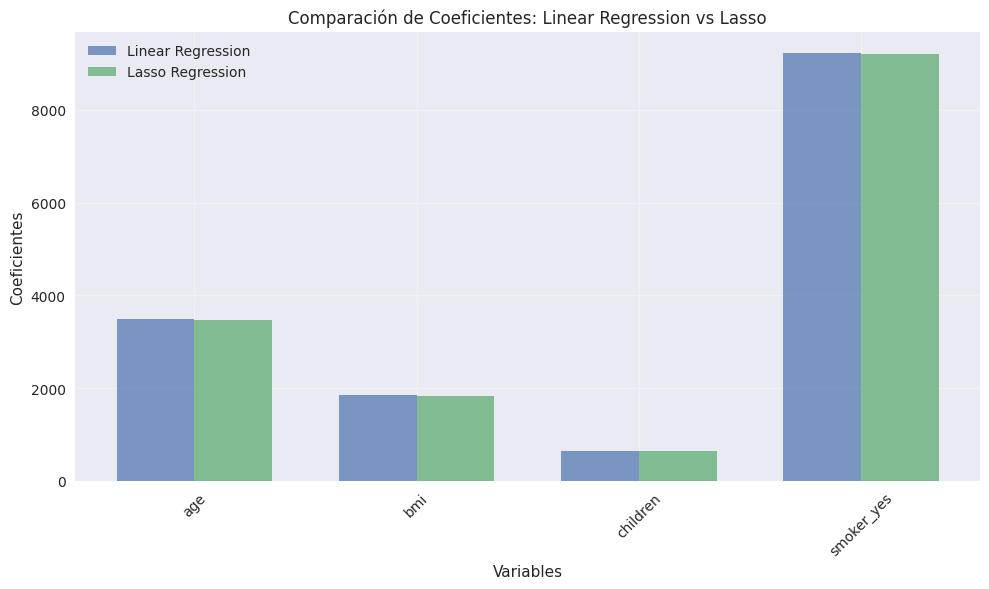

In [34]:
# Visualizar comparación de coeficientes
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(X.columns))
width = 0.35

plt.bar(x_pos - width/2, model.coef_, width, label='Linear Regression', alpha=0.7)
plt.bar(x_pos + width/2, best_lasso.coef_, width, label='Lasso Regression', alpha=0.7)

plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Comparación de Coeficientes: Linear Regression vs Lasso')
plt.xticks(x_pos, X.columns, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
# Resumen final
print("=== RESUMEN FINAL ===")
print(f"Mejor alpha Lasso: {lasso_cv.alpha_}")
print(f"Coeficientes no cero en Lasso: {np.sum(best_lasso.coef_ != 0)} de {len(best_lasso.coef_)}")
print(f"Mejora en Test R²: {lasso_test_r2 - test_r2:.4f}")

=== RESUMEN FINAL ===
Mejor alpha Lasso: 10.0
Coeficientes no cero en Lasso: 4 de 4
Mejora en Test R²: 0.0025
